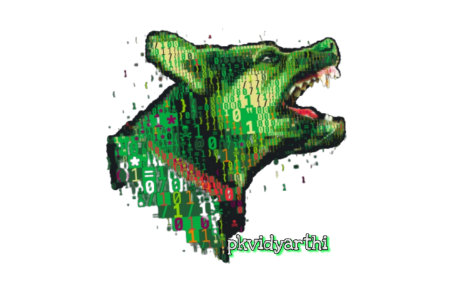

##**Machine Learning 🖥**
---
##**Natural Language Toolkit**
#**Text Analytics**
**𝓑𝔂 ⟹ 𝓟𝓡𝓘𝓝𝓒𝓔👑💗**

**https://github.com/pkvidyarthi/**
___

###**Porter Stemmer ⟶**
* Stemming is a significant part of the pipelining procedure in Natural Language Processing. 
* Stemming is the process of generating morphological modifications of a root/base word. Stemming programs are generally considered as stemming algorithms or stemmers. 
* A stemming algorithm reduces the words like "retrieves", "retrieved", "retrieval" to the root word, "retrieve" and "Choco", "Chocolatey", "Chocolates" reduce to the stem "chocolate".

In [1]:
# Porter Stemming
words = ['program', 'programming', 'programmers', 'programmer', 'programs']
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

for x in words:
  print(x, " : ", ps.stem(x))

program  :  program
programming  :  program
programmers  :  programm
programmer  :  programm
programs  :  program


In [2]:
words2 = ["consult", "consultant", "consulting", "consultantative", "consultants", "consulting"]
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

for x in words2:
  print(x, " : ", ps.stem(x))

consult  :  consult
consultant  :  consult
consulting  :  consult
consultantative  :  consult
consultants  :  consult
consulting  :  consult


###**Stop Words ⟶**
* Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 
* We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. 
* NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory.

###**Text Analytics ⟶**

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Mountong Google Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

**Preprocessing ⟶ LabelEncoder**

Preprocessing without using LabelEncoder, will use List Comperihension.


In [9]:
df['sentiment'] = [1 if sentiment == 'positive' else 0 for sentiment in df['sentiment']]
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

####**Plotting Countplot**

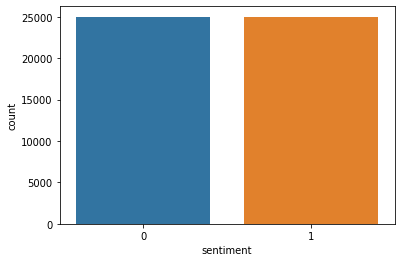

In [10]:
sns.countplot(df['sentiment'])
plt.show()

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

**What is stopwords ?**

In [13]:
# Stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

###**Regular Expression ⟶**
* Regular expression is a set of characters, called as the pattern, which helps in finding substrings in a given string. The pattern is used to detect the substrings

* Example : suppose we have a dataset of customer reviews about a restaurant and we want to extract the emojis from the reviews because they are a good predictor os the sentiment of the review.

* Regular expressions are very powerful tool in text processing. It will help to clean and handle text in a much better way.

####**tqdm ⟶**
**Python external library tqdm :**  to create simple and hassle-free progress bars which can add to code and make it look lively.

In [14]:
# ! pip install tdqm

In [15]:
# Regular Expression
import re
# tqdm
from tqdm import tqdm

In [16]:
corpus = []
for i in tqdm(range(0, len(df))):
  # to read every sentence in every column
  sentence = re.sub('[^a-zA-Z]', ' ', df['review'] [i]) 
  sentence = sentence.lower()
  sentence = sentence.split()
  sentence = [ps.stem(word) for word in sentence if not word in stopwords.words('english')]
  sentence = ' '.join(sentence)
  corpus.append(sentence)

100%|██████████| 50000/50000 [19:02<00:00, 43.75it/s]


**Bag of Words Model**

In [17]:
# Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features = 2500)
# Independent Variable
x1 = cv.fit_transform(corpus).toarray()
# Dependent Variable 
y1 = pd.get_dummies(df['sentiment'])
y1 = y1.iloc[:,1].values

In [18]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size = 0.2, random_state = 1)

In [19]:
xtrain1.shape, xtest1.shape

((40000, 2500), (10000, 2500))

In [20]:
ytrain1.shape, ytest1.shape

((40000,), (10000,))

**Naive Bayes Algorithm**

In [21]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain1, ytrain1)

MultinomialNB()

In [22]:
ypred1 = model.predict(xtest1)
ypred1

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [23]:
# Importing accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(ytest1, ypred1)

0.8442

In [24]:
model.score(xtrain1, ytrain1)

0.84725

**Confusion Matrix**

In [25]:
# Confusion Matrix
cf1 = confusion_matrix(ytest1, ypred1)
cf1

array([[4247,  797],
       [ 761, 4195]])

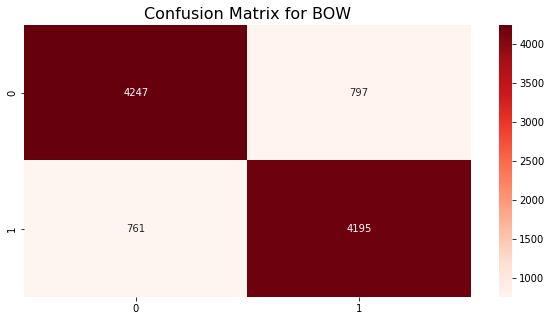

In [26]:
plt.figure(figsize = (10,5))
plt.title("Confusion Matrix for BOW", fontsize = 16)
sns.heatmap(cf1, fmt = 'g', annot = True, cmap = 'Reds')
plt.show()

**Classification Report**

In [27]:
# Classification Report
print(classification_report(ytest1, ypred1))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5044
           1       0.84      0.85      0.84      4956

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [28]:
# Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(max_features = 2500)
# Independent Variable
x = tfidf.fit_transform(corpus).toarray()
# Dependent Variable 
y = pd.get_dummies(df['sentiment'])
y = y.iloc[:,1].values

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

**Random Forest Algorithm**

In [30]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth = 10)
rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)

In [31]:
rf_pred = rf.predict(xtest)
rf_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [32]:
# accuracy score
rf.score(xtest, ytest)

0.8238

In [33]:
rf.score(xtrain, ytrain)

0.85635

**Cnfusion  Matrix for Random Forest**

In [34]:
cf2 = confusion_matrix(ytest, rf_pred)
cf2

array([[3819, 1225],
       [ 537, 4419]])

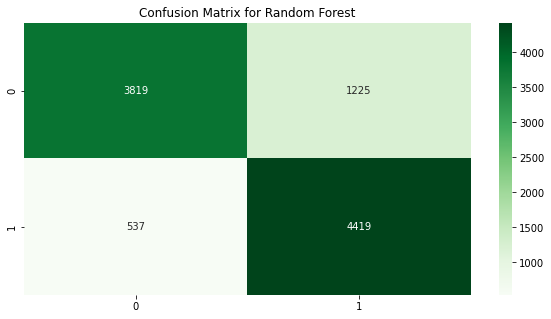

In [35]:
plt.figure(figsize = (10, 5))
plt.title("Confusion Matrix for Random Forest")
sns.heatmap(cf2, fmt = 'g', annot = True, cmap = "Greens")
plt.show()

**Classification Report for Random Forest**

In [36]:
print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      5044
           1       0.78      0.89      0.83      4956

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



**Ada Boost Algorithm** 

In [37]:
# Ada Boost Algorithm
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain, ytrain)
ada_pred = ada.predict(xtest)

In [38]:
ada_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [39]:
# Accuracy Score
ada.score(xtest, ytest)

0.8044

In [40]:
ada.score(xtrain, ytrain)

0.812

**Confusion Matrix for AdaBoost**

In [41]:
cf3 =  confusion_matrix(ytest, ada_pred)
cf3

array([[3878, 1166],
       [ 790, 4166]])

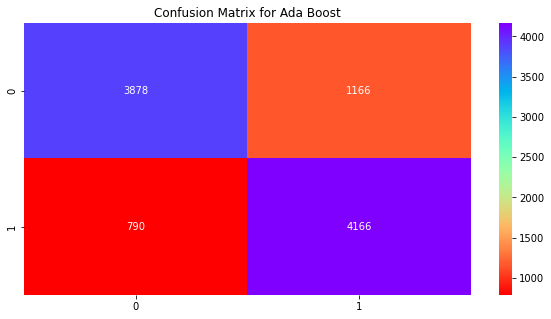

In [42]:
plt.figure(figsize = (10, 5))
plt.title("Confusion Matrix for Ada Boost")
sns.heatmap(cf3, fmt = 'g', annot = True, cmap = 'rainbow_r')
plt.show()

**Classification Report for Ada Boost**

In [43]:
print(classification_report(ytest, ada_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      5044
           1       0.78      0.84      0.81      4956

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



**Gradient BoostingAlgorithm**

In [44]:
# Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)
gbc_pred = gbc.predict(xtest)
gbc_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [45]:
# Accuracy Score
gbc.score(xtest, ytest)

0.8128

In [46]:
gbc.score(xtrain, ytrain)

0.8273

In [47]:
# Confusion Matrix
cf4 = confusion_matrix(ytest, gbc_pred)
cf4

array([[3785, 1259],
       [ 613, 4343]])

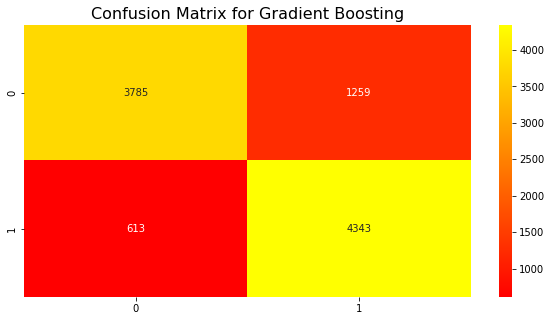

In [48]:
plt.figure(figsize = (10,5))
plt.title('Confusion Matrix for Gradient Boosting', fontsize = 16)
sns.heatmap(cf4, fmt = 'g', annot = True, cmap = 'autumn')

In [49]:
# Classification Report
print(classification_report(ytest, gbc_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      5044
           1       0.78      0.88      0.82      4956

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



**XGBoost Algorithm**

In [50]:
# XGBoost
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(xtrain, ytrain)
xgbc_pred = xgbc.predict(xtest)

In [51]:
xgbc_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=uint8)

In [52]:
# Accuracy Score
xgbc.score(xtest, ytest)

0.8084

In [53]:
accuracy_score(ytest, xgbc_pred)

0.8084

In [54]:
xgbc.score(xtrain, ytrain)

0.823525

In [55]:
# Confusion Matrix
xgbc_cf = confusion_matrix(ytest, xgbc_pred)
xgbc_cf

array([[3730, 1314],
       [ 602, 4354]])

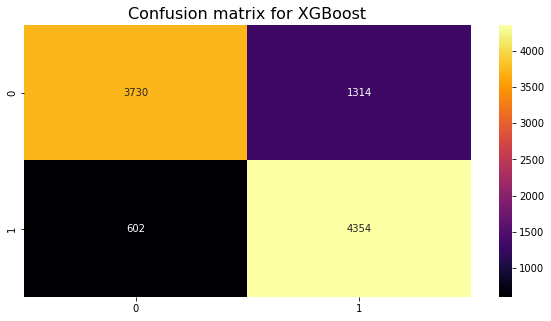

In [56]:
plt.figure(figsize = (10,5))
plt.title("Confusion matrix for XGBoost", fontsize = 16)
sns.heatmap(xgbc_cf, fmt = 'g', annot =True, cmap = 'inferno')
plt.show()

In [57]:
# Classification Report
print(classification_report(ytest, xgbc_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      5044
           1       0.77      0.88      0.82      4956

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



**LightGBM Algorithm**

In [58]:
# LightBGM
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()
lgbc.fit(xtrain, ytrain)
lgbc_pred = lgbc.predict(xtest)

In [59]:
lgbc_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [60]:
# Accuracy Score
lgbc.score(xtest, ytest)

0.8606

In [61]:
lgbc.score(xtrain, ytrain)

0.896125

In [62]:
# Confusion Matrix
lgbc_cf = confusion_matrix(ytest, lgbc_pred)
lgbc_cf

array([[4248,  796],
       [ 598, 4358]])

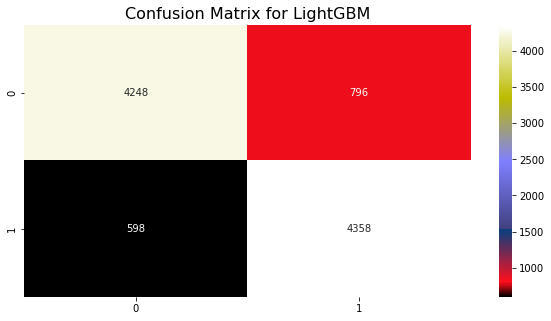

In [63]:
plt.figure(figsize = (10,5))
plt.title('Confusion Matrix for LightGBM', fontsize = 16)
sns.heatmap(lgbc_cf, fmt = 'g', annot = True, cmap = 'gist_stern')
plt.show()

In [64]:
# Classification Report
print(classification_report(ytest, lgbc_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      5044
           1       0.85      0.88      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**CatBoost Algorithm**

In [67]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.6 MB/s eta 0:00:00


In [68]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier()
ctb.fit(xtrain, ytrain)
ctb_pred = ctb.predict(xtest)
ctb_pred

Learning rate set to 0.049775
0:	learn: 0.6772019	total: 1.13s	remaining: 18m 52s
1:	learn: 0.6633155	total: 1.77s	remaining: 14m 43s
2:	learn: 0.6513026	total: 2.4s	remaining: 13m 17s
3:	learn: 0.6404962	total: 3.03s	remaining: 12m 34s
4:	learn: 0.6308196	total: 3.65s	remaining: 12m 5s
5:	learn: 0.6226654	total: 4.26s	remaining: 11m 45s
6:	learn: 0.6150895	total: 4.88s	remaining: 11m 33s
7:	learn: 0.6072890	total: 5.5s	remaining: 11m 22s
8:	learn: 0.6010334	total: 6.15s	remaining: 11m 17s
9:	learn: 0.5954865	total: 6.8s	remaining: 11m 12s
10:	learn: 0.5897561	total: 7.4s	remaining: 11m 5s
11:	learn: 0.5844518	total: 8.03s	remaining: 11m
12:	learn: 0.5793702	total: 8.64s	remaining: 10m 55s
13:	learn: 0.5745359	total: 9.24s	remaining: 10m 50s
14:	learn: 0.5704633	total: 9.88s	remaining: 10m 48s
15:	learn: 0.5665156	total: 10.5s	remaining: 10m 45s
16:	learn: 0.5628858	total: 11.1s	remaining: 10m 42s
17:	learn: 0.5589168	total: 11.7s	remaining: 10m 39s
18:	learn: 0.5555901	total: 12.3s	re

array([0, 0, 0, ..., 0, 1, 0])

In [69]:
# Accuracy Score
ctb.score(xtest, ytest)

0.8692

In [70]:
ctb.score(xtrain, ytrain)

0.91975

In [71]:
# Confusion Matrix
ctb_cf = confusion_matrix(ytest, ctb_pred)
ctb_cf

array([[4261,  783],
       [ 525, 4431]])

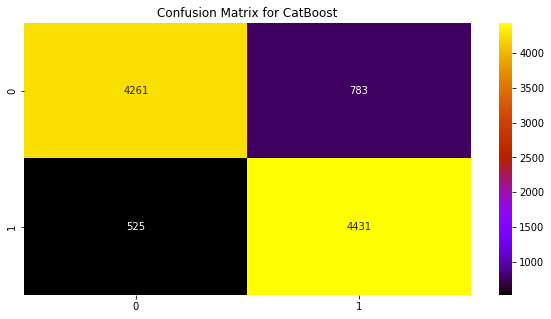

In [72]:
plt.figure(figsize =(10,5))
plt.title('Confusion Matrix for CatBoost')
sns.heatmap(ctb_cf, fmt = 'g', annot = True, cmap = 'gnuplot')
plt.show()

In [73]:
# Classification Report
print(classification_report(ytest, ctb_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      5044
           1       0.85      0.89      0.87      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

